## from https://web.stanford.edu/~boyd/papers/admm/

# Code

In [1]:
code = grabcode("https://web.stanford.edu/~boyd/papers/admm/least_abs_deviations/lad.html")


code =

    'function [x, history] = lad(A, b, rho, alpha)
     % lad  Least absolute deviations fitting via ADMM
     %
     % [x, history] = lad(A, b, rho, alpha)
     % 
     % Solves the following problem via ADMM:
     % 
     %   minimize     ||Ax - b||_1
     %
     % The solution is returned in the vector x.
     %
     % history is a structure that contains the objective value, the primal and 
     % dual residual norms, and the tolerances for the primal and dual residual 
     % norms at each iteration.
     % 
     % rho is the augmented Lagrangian parameter. 
     %
     % alpha is the over-relaxation parameter (typical values for alpha are 
     % between 1.0 and 1.8).
     %
     %
     % More information can be found in the paper linked at:
     % http://www.stanford.edu/~boyd/papers/distr_opt_stat_learning_admm.html
     %
     
     t_start = tic;
     
     %% Global constants and defaults
     
     QUIET    = 0;
     MAX_ITER = 1000;
     ABSTOL   = 1e-4;
     RELT

In [2]:
%%file lad.m

function [x, history] = lad(A, b, rho, alpha)
% lad  Least absolute deviations fitting via ADMM
%
% [x, history] = lad(A, b, rho, alpha)
%
% Solves the following problem via ADMM:
%
%   minimize     ||Ax - b||_1
%
% The solution is returned in the vector x.
%
% history is a structure that contains the objective value, the primal and
% dual residual norms, and the tolerances for the primal and dual residual
% norms at each iteration.
%
% rho is the augmented Lagrangian parameter.
%
% alpha is the over-relaxation parameter (typical values for alpha are
% between 1.0 and 1.8).
%
%
% More information can be found in the paper linked at:
% http://www.stanford.edu/~boyd/papers/distr_opt_stat_learning_admm.html
%

t_start = tic;

%% Global constants and defaults

QUIET    = 0;
MAX_ITER = 1000;
ABSTOL   = 1e-4;
RELTOL   = 1e-2;

[m n] = size(A);

%% ADMM solver

x = zeros(n,1);
z = zeros(m,1);
u = zeros(m,1);

if ~QUIET
    fprintf('%3s\t%10s\t%10s\t%10s\t%10s\t%10s\n', 'iter', ...
      'r norm', 'eps pri', 's norm', 'eps dual', 'objective');
end

for k = 1:MAX_ITER

    if k > 1
        x = R \ (R' \ (A'*(b + z - u)));
    else
        R = chol(A'*A);
        x = R \ (R' \ (A'*(b + z - u)));
    end

    zold = z;
    Ax_hat = alpha*A*x + (1-alpha)*(zold + b);
    z = shrinkage(Ax_hat - b + u, 1/rho);

    u = u + (Ax_hat - z - b);

    % diagnostics, reporting, termination checks

    history.objval(k)  = objective(z);

    history.r_norm(k)  = norm(A*x - z - b);
    history.s_norm(k)  = norm(-rho*A'*(z - zold));

    history.eps_pri(k) = sqrt(m)*ABSTOL + RELTOL*max([norm(A*x), norm(-z), norm(b)]);
    history.eps_dual(k)= sqrt(n)*ABSTOL + RELTOL*norm(rho*A'*u);

    if ~QUIET
        fprintf('%3d\t%10.4f\t%10.4f\t%10.4f\t%10.4f\t%10.2f\n', k, ...
            history.r_norm(k), history.eps_pri(k), ...
            history.s_norm(k), history.eps_dual(k), history.objval(k));
    end

    if (history.r_norm(k) < history.eps_pri(k) && ...
       history.s_norm(k) < history.eps_dual(k))
         break;
    end
end

if ~QUIET
    toc(t_start);
end
end

function obj = objective(z)
    obj = norm(z,1);
end

function y = shrinkage(a, kappa)
    y = max(0, a-kappa) - max(0, -a-kappa);
end

Created file '/home/wenh06/Jupyter/wenhao/workspace/fl_seminar/code/boyd-admm/lad.m'.


# Example

In [3]:
eg_code = grabcode("https://web.stanford.edu/~boyd/papers/admm/least_abs_deviations/lad_example.html")


eg_code =

    '% Least absolute deviations example
     
     %% Generate problem data
     rand('seed', 0);
     randn('seed', 0);
     
     m = 1000; % number of examples
     n = 100;  % number of features
     
     A = randn(m,n);
     x0 = 10*randn(n,1);
     b = A*x0;
     idx = randsample(m,ceil(m/50));
     b(idx) = b(idx) + 1e2*randn(size(idx));
     
     %% Solve problem
     
     [x history] = lad(A, b, 1.0, 1.0);
     
     %% Reporting
     K = length(history.objval);                                                                                                        
     
     h = figure;
     plot(1:K, history.objval, 'k', 'MarkerSize', 10, 'LineWidth', 2); 
     ylabel('f(x^k) + g(z^k)'); xlabel('iter (k)');
     
     g = figure;
     subplot(2,1,1);                                                                                                                    
     semilogy(1:K, max(1e-8, history.r_norm), 'k', ...
         1:K, history.eps_pri, 'k--',  'Li

### Generate problem data

In [4]:
rand('seed', 0);
randn('seed', 0);

m = 1000; % number of examples
n = 100;  % number of features

A = randn(m,n);
x0 = 10*randn(n,1);
b = A*x0;
idx = randsample(m,ceil(m/50));
b(idx) = b(idx) + 1e2*randn(size(idx));

### Solve problem

In [5]:
[x history] = lad(A, b, 1.0, 1.0);

iter	    r norm	   eps pri	    s norm	  eps dual	 objective
  1	   30.1596	   34.3292	  690.6743	    6.9077	   4773.18
  2	    3.7155	   34.3292	  688.4685	    6.8857	   4637.05
  3	    3.0866	   34.3292	  682.3849	    6.8248	   4152.80
  4	    3.8887	   34.3292	  671.2751	    6.7138	   3675.84
  5	    4.5094	   34.3292	  656.2406	    6.5634	   3222.49
  6	    5.0494	   34.3292	  641.7290	    6.4183	   2786.84
  7	    4.9828	   34.3292	  630.5902	    6.3069	   2372.09
  8	    4.7762	   34.3292	  610.1365	    6.1024	   1993.60
  9	   10.4738	   34.3292	  377.8906	    3.7799	   1798.79
 10	   12.5191	   34.3292	   28.8587	    0.2896	   1790.43
 11	    2.1989	   34.3292	   42.5469	    0.4265	   1780.46
 12	    0.9115	   34.3292	   18.6326	    0.1873	   1776.38
 13	    0.7020	   34.3292	    1.3172	    0.0142	   1776.70
 14	    0.0953	   34.3292	    3.3369	    0.0344	   1777.30
 15	    0.0848	   34.3292	    1.0074	    0.0111	   1777.44
 16	    0.0440	   34.3292	    0.2302	    0.0033	   1777

### Reporting

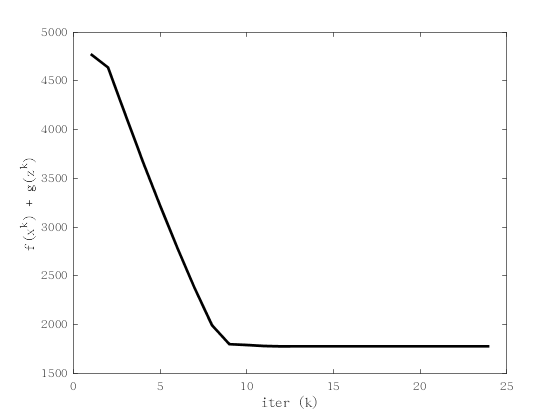

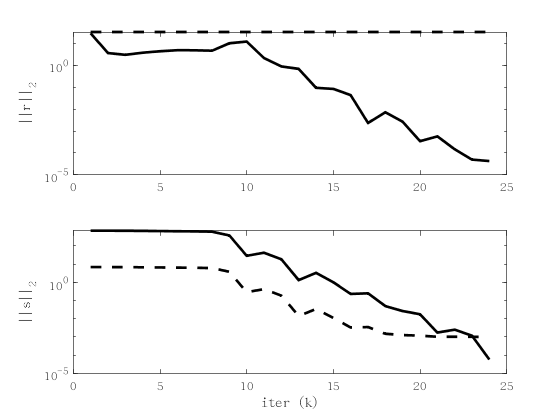

In [6]:
K = length(history.objval);

h = figure;
plot(1:K, history.objval, 'k', 'MarkerSize', 10, 'LineWidth', 2);
ylabel('f(x^k) + g(z^k)'); xlabel('iter (k)');

g = figure;
subplot(2,1,1);
semilogy(1:K, max(1e-8, history.r_norm), 'k', ...
    1:K, history.eps_pri, 'k--',  'LineWidth', 2);
ylabel('||r||_2');

subplot(2,1,2);
semilogy(1:K, max(1e-8, history.s_norm), 'k', ...
    1:K, history.eps_dual, 'k--', 'LineWidth', 2);
ylabel('||s||_2'); xlabel('iter (k)');